In [5]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
%matplotlib inline

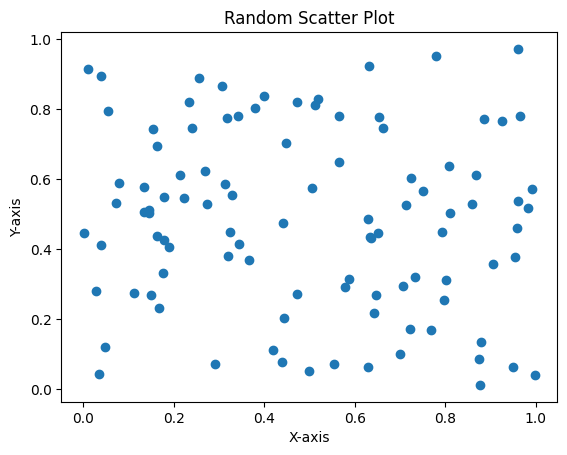

In [218]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)

plt.scatter(x, y)

plt.title("Random Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()

In [64]:
yaml_data = """
start: ConcatenableFunction
rules:
  - lhs: ConcatenableFunction
    rhs:
      - ConcatenableFunction
      - ConcatenableFunction
    name: "and"
  - lhs: ConcatenableFunction
    rhs:
      - SetFunction
    name: "translate"
  - lhs: ConcatenableFunction
    rhs:
      - SetFunction
    name: "rotate"
  - lhs: ConcatenableFunction
    rhs:
      - SetFunction
    name: "scale"
  - lhs: ConcatenableFunction
    rhs:
      - SetFunction
    name: "align"
  - lhs: ConcatenableFunction
    rhs:
      - SetFunction
    name: "diffuse"
  - lhs: SetFunction
    name: "A"
"""

data = yaml.safe_load(yaml_data)

rules = data['rules']
start_class = data['start']


In [219]:
import itertools



def generate_permutations(lhs, depth, current_depth=0):
    if current_depth >= depth:
        return []
    
    applicable_rules = find_applicable_rules(lhs)
    permutations = set()
    
    for rule in applicable_rules:
        rhs = rule.get('rhs', [])
        rule_name = rule['name']
        if not rhs:
            permutations.add(rule_name)
        else:
            sub_permutations = [generate_permutations(sub_lhs, depth, current_depth + 1) for sub_lhs in rhs]
            all_combinations = itertools.product(*sub_permutations)
            for combination in all_combinations:
                combined = ",".join(combination)
                expression = f"{rule_name}({combined})"
                permutations.add(expression)
    
    return permutations

depth = 4

results = generate_permutations(start_class, depth)

sorted_results = sorted(results)


In [220]:
len(sorted_results)

905

In [221]:
import ast

def parse_expression(expr):
    # Replace 'and' with 'and_' to avoid conflicts with the Python keyword
    expr = expr.replace('and(', 'and_(')
    node = ast.parse(expr, mode='eval').body
    return convert_node(node)

def convert_node(node):
    if isinstance(node, ast.Call):
        func_name = node.func.id
        if func_name == 'and_':
            func_name = 'and'  # Restore original function name
        args = [convert_node(arg) for arg in node.args]
        return {func_name: args}
    elif isinstance(node, ast.Name):
        return node.id
    else:
        raise TypeError(f"Unsupported AST node type: {type(node).__name__}")

# Example usage to parse a list of hierarchical expressions
expressions = [
    'align(A)',
    'and(align(A),align(A))',
    'and(align(A),and(align(A),align(A)))',
    'and(align(A),and(align(A),diffuse(A)))',
    'and(align(A),and(align(A),rotate(A)))',
    'and(align(A),and(align(A),scale(A)))',
    'and(align(A),and(align(A),translate(A)))',
    'and(align(A),and(diffuse(A),align(A)))',
    'and(align(A),and(diffuse(A),diffuse(A)))',
    'and(align(A),and(diffuse(A),rotate(A)))',
    'and(align(A),and(diffuse(A),scale(A)))',
    'and(align(A),and(diffuse(A),translate(A)))',
    'and(align(A),and(rotate(A),align(A)))',
    'and(align(A),and(rotate(A),diffuse(A)))',
    'and(align(A),and(rotate(A),rotate(A)))',
    'and(align(A),and(rotate(A),scale(A)))',
    'and(align(A),and(rotate(A),translate(A)))',
    'and(align(A),and(scale(A),align(A)))',
    'and(align(A),and(scale(A),diffuse(A)))',
]

parsed_structures = [parse_expression(expr) for expr in expressions]

parsed_structures


[{'align': ['A']},
 {'and': [{'align': ['A']}, {'align': ['A']}]},
 {'and': [{'align': ['A']}, {'and': [{'align': ['A']}, {'align': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'align': ['A']}, {'diffuse': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'align': ['A']}, {'rotate': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'align': ['A']}, {'scale': ['A']}]}]},
 {'and': [{'align': ['A']},
   {'and': [{'align': ['A']}, {'translate': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'diffuse': ['A']}, {'align': ['A']}]}]},
 {'and': [{'align': ['A']},
   {'and': [{'diffuse': ['A']}, {'diffuse': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'diffuse': ['A']}, {'rotate': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'diffuse': ['A']}, {'scale': ['A']}]}]},
 {'and': [{'align': ['A']},
   {'and': [{'diffuse': ['A']}, {'translate': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'rotate': ['A']}, {'align': ['A']}]}]},
 {'and': [{'align': ['A']}, {'and': [{'rotate': ['A'

In [222]:
def align(arg):
    return f"align({arg})"

def diffuse(arg):
    return f"diffuse({arg})"

def rotate(arg):
    return f"rotate({arg})"

def scale(arg):
    return f"scale({arg})"

def translate(arg):
    return f"translate({arg})"

In [223]:
function_map = {
    'align': align,
    'diffuse': diffuse,
    'rotate': rotate,
    'scale': scale,
    'translate': translate,
    'and': and_,
}

In [224]:
# Example usage
expressions = [
    'align(A)',
    'and(align(A),align(A))',
    'and(align(A),and(align(A),align(A)))',
]

# Parse expressions
parsed_structures = [parse_expression(expr) for expr in expressions]

# Evaluate each parsed structure
evaluated_results = [evaluate_expression(parsed_expr) for parsed_expr in parsed_structures]

In [225]:
evaluated_results


['align(A)',
 'and(align(A), align(A))',
 'and(align(A), and(align(A), align(A)))']

In [80]:
import numpy as np

In [226]:
random_array = np.random.rand(2, 100)


In [227]:
def sample_random_indices(num_points=100, max_samples=50):
    """Randomly samples a set of indices from 0 to num_points - 1.
    
    Args:
        num_points (int): The total number of points available.
        max_samples (int): The maximum number of indices to sample.
        
    Returns:
        numpy.ndarray: An array of randomly sampled indices.
    """
    num_samples = np.random.randint(0, max_samples + 1)
    indices = np.random.choice(num_points, num_samples, replace=False)
    return indices

In [228]:
def select_indices_within_bounds(points, x_min, x_max, y_min, y_max):
    """Selects indices of points from a 2D numpy array within the specified bounds.
    
    Args:
        points (numpy.ndarray): A 2D numpy array of shape (2, N) where N is the number of points.
        x_min (float): The minimum x-coordinate of the bounding box.
        x_max (float): The maximum x-coordinate of the bounding box.
        y_min (float): The minimum y-coordinate of the bounding box.
        y_max (float): The maximum y-coordinate of the bounding box.
        
    Returns:
        numpy.ndarray: An array of indices of points within the specified bounds.
    """
    x_coords = points[0, :]
    y_coords = points[1, :]
    
    within_x_bounds = (x_coords >= x_min) & (x_coords <= x_max)
    within_y_bounds = (y_coords >= y_min) & (y_coords <= y_max)
    within_bounds = within_x_bounds & within_y_bounds
    
    return np.where(within_bounds)[0]



In [229]:
# Generate a random 2x100 numpy array
points = np.random.rand(2, 100)

# Sample random indices
random_indices = sample_random_indices(num_points=100, max_samples=50)

# Select sampled points
sampled_points = points[:, random_indices]

# Define bounds
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0

# Select points within bounds
bounds_indices = select_indices_within_bounds(points, x_min, x_max, y_min, y_max)
points[:, bounds_indices]


array([[0.34238621, 0.30697665, 0.73123649, 0.37743298, 0.59630009,
        0.18610252, 0.79199693, 0.06504293, 0.60096798, 0.04505092,
        0.86770215, 0.03831665, 0.70981668, 0.97132828, 0.98983487,
        0.01055973, 0.5083341 , 0.00141726, 0.81147708, 0.80565214,
        0.10937097, 0.37138366, 0.67481678, 0.62934121, 0.30999389,
        0.40877494, 0.53947926, 0.45488209, 0.10894047, 0.3398542 ,
        0.4843526 , 0.66604022, 0.73998451, 0.62537765, 0.18990528,
        0.92451912, 0.87051179, 0.09948023, 0.83849157, 0.08781326,
        0.06400847, 0.05224264, 0.57645244, 0.32887532, 0.59748136,
        0.22774054, 0.98698419, 0.36560316, 0.54371733, 0.37347119,
        0.58599774, 0.23816567, 0.9155708 , 0.54066076, 0.54813549,
        0.13869761, 0.14748394, 0.04624012, 0.12797963, 0.39311989,
        0.29369153, 0.86471981, 0.33755396, 0.27549683, 0.69505656,
        0.4354873 , 0.90515156, 0.93695459, 0.4983296 , 0.29307629,
        0.30184348, 0.28929493, 0.02125589, 0.40

In [233]:
def create_irregular_random_bounds(alpha=2.0, beta=2.0, size_control=1.0):
    """Creates random contiguous bounds using the Beta distribution for irregular shapes.
    
    Args:
        alpha (float): Shape parameter for the Beta distribution (for x bounds).
        beta (float): Shape parameter for the Beta distribution (for y bounds).
        size_control (float): Control the expected size of the shape (0 to 1).

    Returns:
        tuple: A tuple containing (x_min, x_max, y_min, y_max).
    """
    # Adjust the alpha and beta parameters to control the shape irregularity and size
    x_min, x_max = np.sort(np.random.beta(alpha * size_control, beta * size_control, 2))
    y_min, y_max = np.sort(np.random.beta(alpha * size_control, beta * size_control, 2))
    
    return x_min, x_max, y_min, y_max

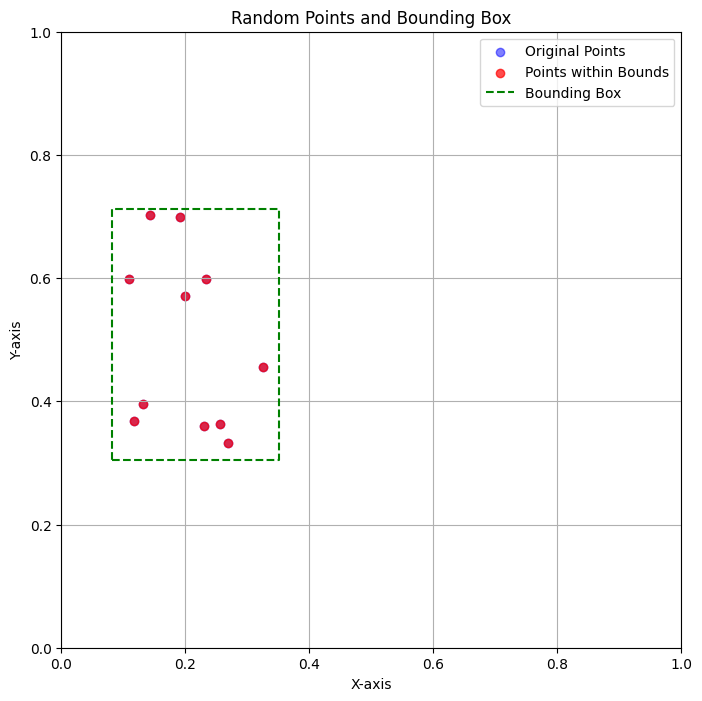

In [251]:
import matplotlib.pyplot as plt

# Function to plot points and the bounding box
def plot_points_with_bounds(points, x_min, x_max, y_min, y_max, bounded_points=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[0, :], points[1, :], color='blue', label='Original Points', alpha=0.5)
    
    if bounded_points is not None:
        plt.scatter(bounded_points[0, :], bounded_points[1, :], color='red', label='Points within Bounds', alpha=0.7)
    
    # Draw the bounding box
    plt.plot([x_min, x_max, x_max, x_min, x_min],
             [y_min, y_min, y_max, y_max, y_min],
             color='green', linestyle='--', label='Bounding Box')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Random Points and Bounding Box')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate a random 2x100 numpy array
points = np.random.rand(2, 100)

# Create irregular random bounds with a desired shape size
x_min, x_max, y_min, y_max = create_irregular_random_bounds(alpha=2.0, beta=2.0, size_control=0.5)

# Select points within the irregular random bounds
bounded_indices = select_indices_within_bounds(points, x_min, x_max, y_min, y_max)

# Visualize the points and the bounding box
plot_points_with_bounds(points[:, bounded_indices], x_min, x_max, y_min, y_max, points[:, bounded_indices])


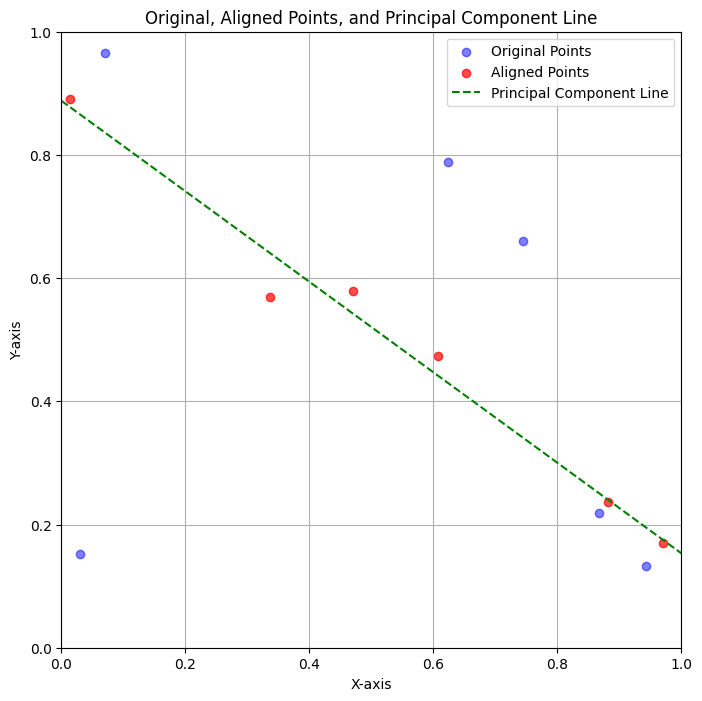

In [252]:
from sklearn.decomposition import PCA

def align_points_with_pca(points, indices, straightness_factor=None):
    """Aligns the selected points along the principal component with a random degree of straightness.
    
    Args:
        points (numpy.ndarray): A 2D array of points to be aligned (shape: 2xN).
        straightness_factor (float): Degree of straightness (0 to 1). 
                                     0 means no alignment, 1 means perfect alignment.
                                     If None, a random straightness factor is chosen.
        
    Returns:
        numpy.ndarray: The aligned points.
        numpy.ndarray: The principal component line (for visualization).
    """
    if straightness_factor is None:
        straightness_factor = np.random.uniform(0, 1)
    
    # Center the data
    mean_point = np.mean(points[:, indices], axis=1)
    centered_points = points[:, indices] - mean_point[:, np.newaxis]
    
    # Perform PCA
    pca = PCA(n_components=1)
    pca.fit(centered_points.T)
    
    # Get the principal component (direction vector)
    principal_component = pca.components_[0]
    
    # Project the points onto the principal component
    projections = np.dot(principal_component, centered_points)
    projected_points = np.outer(principal_component, projections)
    projected_points += mean_point[:, np.newaxis]
    
    # Interpolate between original points and projected points based on straightness factor
    aligned_points = (1 - straightness_factor) * points[:, indices] + straightness_factor * projected_points
    
    return aligned_points, mean_point, principal_component

def plot_with_principal_component(points, aligned_points, mean_point, principal_component):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[0, :], points[1, :], color='blue', label='Original Points', alpha=0.5)
    plt.scatter(aligned_points[0, :], aligned_points[1, :], color='red', label='Aligned Points', alpha=0.7)
    
    # Plot the principal component line
    line_length = np.linalg.norm(points[:, 0] - points[:, -1])
    line_vector = principal_component * line_length
    line_points = np.vstack((mean_point - line_vector, mean_point + line_vector)).T
    plt.plot(line_points[0], line_points[1], color='green', linestyle='--', label='Principal Component Line')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Original, Aligned Points, and Principal Component Line')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate a random 2x100 numpy array
points = np.random.rand(2, 100)

# Align points with a random degree of straightness using PCA and get the principal component line
aligned_points, mean_point, principal_component = align_points_with_pca(points, selected_indices, straightness_factor=.9)

# Plot the original, aligned points, and the principal component line
plot_with_principal_component(points[:, selected_indices], aligned_points, mean_point, principal_component)


In [142]:
def bound_points(points, min_value=0.0, max_value=1.0):
    """Bounds all points within the specified range on both axes.
    
    Args:
        points (numpy.ndarray): A 2D array of points (shape: 2xN).
        min_value (float): The minimum allowed value for both axes.
        max_value (float): The maximum allowed value for both axes.
    
    Returns:
        numpy.ndarray: The bounded points.
    """
    bounded_points = np.clip(points, min_value, max_value)
    return bounded_points


In [254]:
def diffuse(points, indices, magnitude=0.1):
    """Adds random perturbations to selected points."""
    transformed_points = points.copy()
    perturbations = np.random.uniform(-magnitude, magnitude, (2, len(indices)))
    transformed_points[:, indices] += perturbations
    return transformed_points

def rotate(points, indices, angle):
    """Rotates selected points around the origin by a specified angle (in radians)."""
    transformed_points = points.copy()
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    transformed_points[:, indices] = rotation_matrix @ points[:, indices]
    return transformed_points

def scale(points, indices, factor):
    """Scales selected points' distances from the origin by a specified factor."""
    transformed_points = points.copy()
    transformed_points[:, indices] *= factor
    return transformed_points

def translate(points, indices, offset):
    """Translates selected points by a specified offset."""
    transformed_points = points.copy()
    transformed_points[:, indices] += offset[:, np.newaxis]
    return transformed_points


In [255]:
random_indices = sample_random_indices()

In [256]:
selected_indices

array([27, 34, 46, 61, 76, 80])

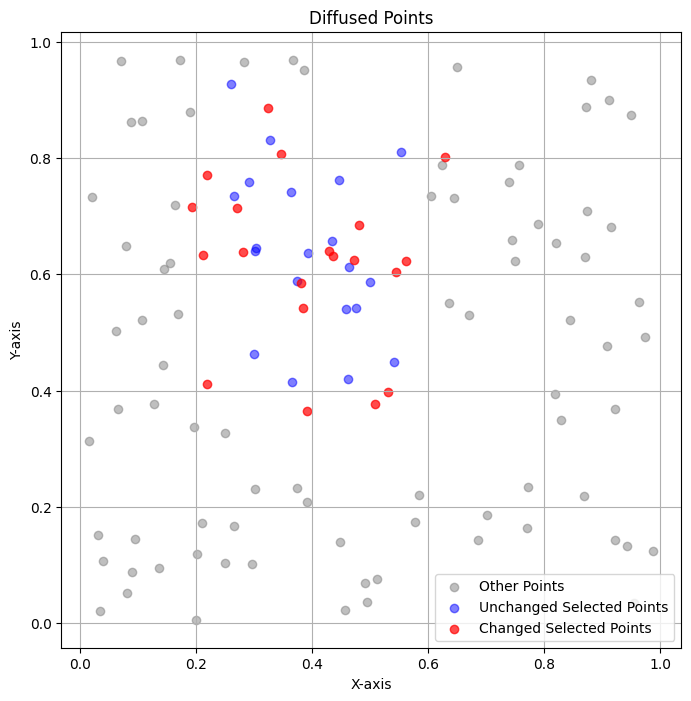

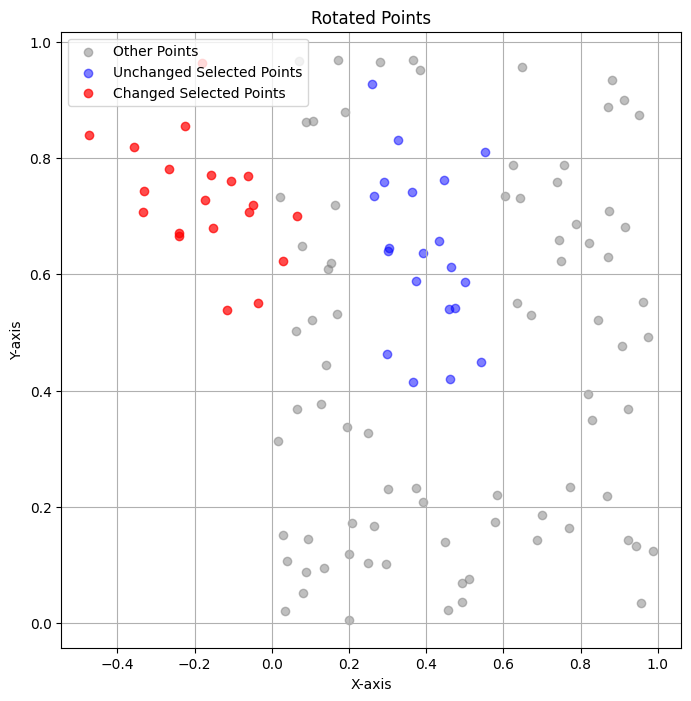

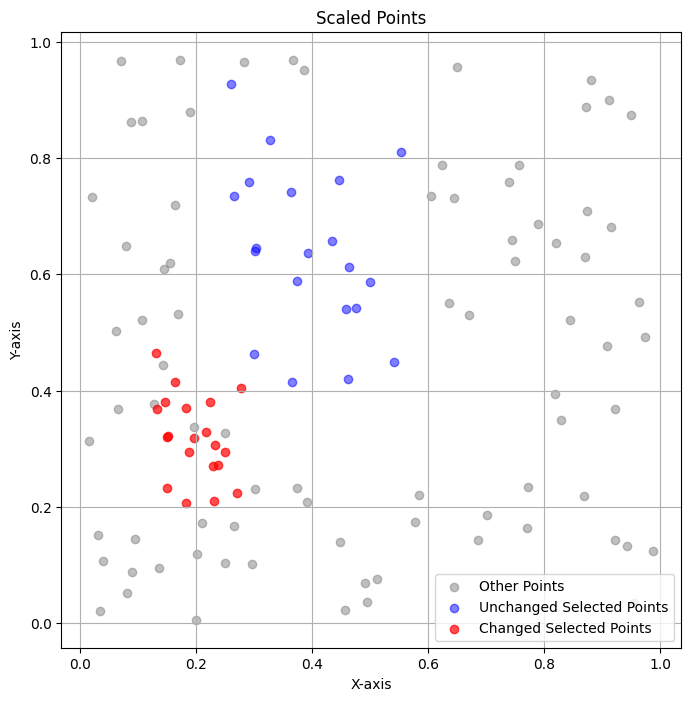

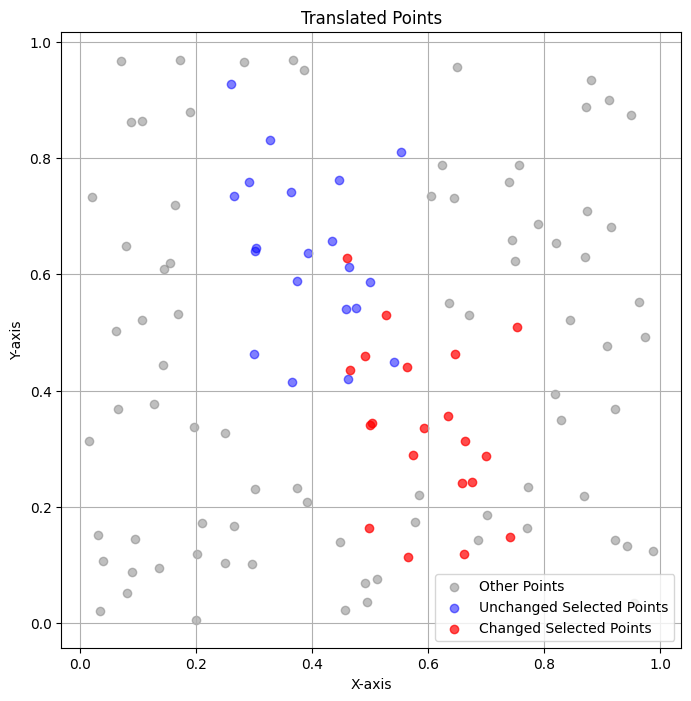

In [257]:
def plot_transformed_points(original_points, transformed_points, indices, title):
    plt.figure(figsize=(8, 8))
    
    # All other points
    other_indices = np.setdiff1d(np.arange(original_points.shape[1]), indices)
    plt.scatter(original_points[0, other_indices], original_points[1, other_indices], 
                color='gray', label='Other Points', alpha=0.5)
    
    # Selected points that don't change
    unchanged_points = original_points[:, indices]
    plt.scatter(unchanged_points[0, :], unchanged_points[1, :], 
                color='blue', label='Unchanged Selected Points', alpha=0.5)
    
    # Selected points that change
    changed_points = transformed_points[:, indices]
    plt.scatter(changed_points[0, :], changed_points[1, :], 
                color='red', label='Changed Selected Points', alpha=0.7)
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with visualization
#points = np.random.rand(2, 100)
#selected_indices = np.random.choice(100, size=20, replace=False)

# Create irregular random bounds with a desired shape size
x_min, x_max, y_min, y_max = create_irregular_random_bounds(alpha=2.0, beta=2.0, size_control=0.5)

# Select points within the irregular random bounds
selected_indices = select_indices_within_bounds(points, x_min, x_max, y_min, y_max)

# Apply transformations and visualize
diffused_points = diffuse(points, selected_indices, magnitude=0.1)
plot_transformed_points(points, diffused_points, selected_indices, "Diffused Points")

rotated_points = rotate(points, selected_indices, angle=np.pi/4)
plot_transformed_points(points, rotated_points, selected_indices, "Rotated Points")

scaled_points = scale(points, selected_indices, factor=0.5)
plot_transformed_points(points, scaled_points, selected_indices, "Scaled Points")

translated_points = translate(points, selected_indices, offset=np.array([0.2, -0.3]))
plot_transformed_points(points, translated_points, selected_indices, "Translated Points")
